10. Categorize news headlines into topics. Use a dataset of news headlines from various domains.
i. Implement a text classification model to categorize headlines into topics (e.g., sports, politics, technology).

ii. Discuss potential applications in news aggregation services.

**Objective**

To build a text classification model that can automatically categorize news headlines into predefined topics such as sports, politics, business, technology, entertainment, etc.

**NLP preprocessing techniques**

Feature extraction using TF-IDF

Model building using machine learning

Evaluation of classification performance

**Dataset**

Dataset Name: News Category Dataset Source: Kaggle - News Category Dataset

**Fields:**

headline: the headline text

category: the label/topic (like politics, tech, business, etc.)

In [3]:


# STEP 1: Install and Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# STEP 2: Upload Dataset
from google.colab import files
uploaded = files.upload()

Saving News_Category_Dataset_v3.json to News_Category_Dataset_v3 (1).json


Total Records: (66137, 2)
Category Distribution:
category
POLITICS         35602
ENTERTAINMENT    17362
BUSINESS          5992
SPORTS            5077
TECH              2104
Name: count, dtype: int64
🔹 Accuracy: 0.8302842455397641

🔹 Classification Report:
                precision    recall  f1-score   support

     BUSINESS       0.82      0.40      0.54      1226
ENTERTAINMENT       0.85      0.86      0.85      3501
     POLITICS       0.81      0.97      0.88      7076
       SPORTS       0.93      0.57      0.70      1006
         TECH       0.86      0.19      0.31       419

     accuracy                           0.83     13228
    macro avg       0.85      0.60      0.66     13228
 weighted avg       0.83      0.83      0.81     13228



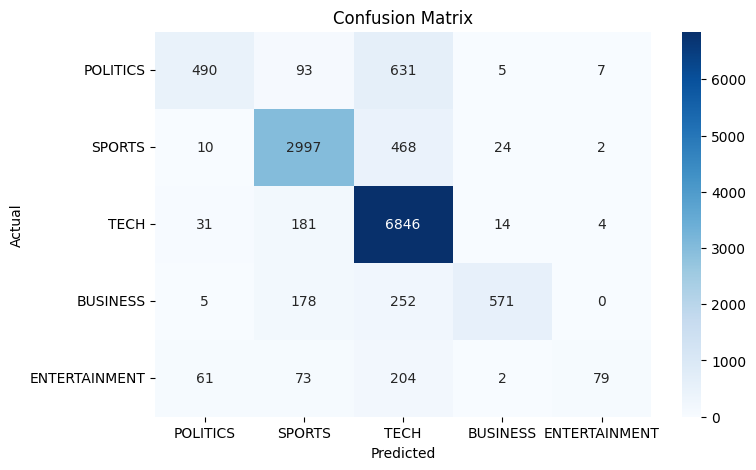

📝 'PM announces new economic reforms for growth' ➡️ Predicted Category: POLITICS
📝 'Cristiano Ronaldo scores a stunning hat-trick' ➡️ Predicted Category: SPORTS
📝 'Google launches AI-powered assistant' ➡️ Predicted Category: TECH
📝 'Oscars 2025: Best actor nominations revealed' ➡️ Predicted Category: ENTERTAINMENT
📝 'Stock markets crash after tech sell-off' ➡️ Predicted Category: BUSINESS


In [4]:
#  STEP 3: Load the Dataset
df = pd.read_json("News_Category_Dataset_v3.json", lines=True)
df = df[['headline', 'category']]

# Optional: Display first few rows
df.head()

#  STEP 4: Filter for selected categories (you can change as needed)
categories_to_use = ['POLITICS', 'SPORTS', 'TECH', 'BUSINESS', 'ENTERTAINMENT']
df = df[df['category'].isin(categories_to_use)]

print("Total Records:", df.shape)
print("Category Distribution:")
print(df['category'].value_counts())

# STEP 5: Text Preprocessing
df['headline'] = df['headline'].str.lower()

#  STEP 6: Split Data
X = df['headline']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# STEP 8: Train the Model (Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# STEP 9: Predictions & Evaluation
y_pred = model.predict(X_test_tfidf)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# STEP 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories_to_use, yticklabels=categories_to_use, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# STEP 11: Try Sample Headlines
sample_headlines = [
    "PM announces new economic reforms for growth",
    "Cristiano Ronaldo scores a stunning hat-trick",
    "Google launches AI-powered assistant",
    "Oscars 2025: Best actor nominations revealed",
    "Stock markets crash after tech sell-off"
]

sample_tfidf = vectorizer.transform(sample_headlines)
sample_preds = model.predict(sample_tfidf)

for headline, label in zip(sample_headlines, sample_preds):
    print(f"📝 '{headline}' ➡️ Predicted Category: {label}")
